# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [85]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [93]:
pd.options.display.float_format = '{:,.2f}'.format

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# Read the Data

In [87]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [88]:
print(f"Shape: {data.shape}")
print(f"NaN values: {data.isna().values.any()}")
print(f"Duplicated values: {data.duplicated().any()}")
print(f"{data.dtypes}")

Shape: (5391, 6)
NaN values: False
Duplicated values: False
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [89]:
data.USD_Production_Budget = [pd.to_numeric(x.replace("$","").replace(",","")) for x in data.USD_Production_Budget]
data.USD_Worldwide_Gross = [pd.to_numeric(x.replace("$","").replace(",","")) for x in data.USD_Worldwide_Gross]
data.USD_Domestic_Gross = [pd.to_numeric(x.replace("$","").replace(",","")) for x in data.USD_Domestic_Gross]
data.dtypes


Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [90]:
data.Release_Date = pd.to_datetime(data.Release_Date)
print(f"{data.Release_Date.head(n=10)}\n")
print(f"{data.info()}")

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
5   1925-12-30
6   1927-12-08
7   1929-01-02
8   1930-01-01
9   1931-12-31
Name: Release_Date, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB
None


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [122]:
print(f"Average Production Budget: {data.USD_Production_Budget.mean()}")
print(f"Average Worldwide Gross Revenue: {data.USD_Worldwide_Gross.mean()}")
print(f"Worldwide revenue minimum: {data.USD_Worldwide_Gross.min()}" 
      f" and Domestic revenue minimum: {data.USD_Domestic_Gross.min()}")
print(f"Worldwide revenue maximum: {data.USD_Worldwide_Gross.max()}" 
      f" and Production budget maximum: {data.USD_Domestic_Gross.max()}")
print(f"Revenue for lowest budget: {data.USD_Worldwide_Gross[data.USD_Production_Budget.idxmin()]}")
print(f"Revenue for highest budget: {data.USD_Worldwide_Gross[data.USD_Production_Budget.idxmax()]}\n")


lower_quarter = int(25/100 * data.shape[0])
print(data.tail(n=lower_quarter).tail(10))


Average Production Budget: 31113737.57837136
Average Worldwide Gross Revenue: 88855421.96271564
Worldwide revenue minimum: 0 and Domestic revenue minimum: 0
Worldwide revenue maximum: 2783918982 and Production budget maximum: 936662225
Revenue for lowest budget: 181041
Revenue for highest budget: 2783918982

      Rank Release_Date                       Movie_Title  \
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   
5384   321   2018-09-03                 A Wrinkle in Time   
5385   366   2018-10-08                    Amusement Park   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Producti

In [124]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [149]:
print(data[data.USD_Domestic_Gross == 0].USD_Domestic_Gross.count())
print(data[data.USD_Domestic_Gross == 0].USD_Production_Budget.sort_values(ascending=False).head(n=10))
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

512
5388    175000000
5387    160000000
5384    103000000
5385    100000000
5090     80000000
4294     77600000
5058     60000000
5338     60000000
5389     50000000
4295     45000000
Name: USD_Production_Budget, dtype: int64


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [147]:
print(data[data.USD_Worldwide_Gross == 0].USD_Worldwide_Gross.count())
print(data[data.USD_Worldwide_Gross == 0].USD_Production_Budget.sort_values(ascending=False).head(n=10))
data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

357
5388    175000000
5387    160000000
5384    103000000
5385    100000000
5058     60000000
5338     60000000
5389     50000000
5092     40000000
3300     35000000
5045     33000000
Name: USD_Production_Budget, dtype: int64


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [152]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(len(international_releases))
print(international_releases.head())

155
      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [162]:
inter_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
inter_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [91]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [172]:
unreleased_films = data[data.Release_Date > pd.to_datetime('2018-05-01')]
print(f"Number of unreleased films: {len(unreleased_films)}\n")
data_clean = data.drop(unreleased_films.index)
print(data_clean.shape)

Number of unreleased films: 7

(5384, 6)


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [180]:
num_film_losses = len(data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross])
loss_percentage = (num_film_losses / data_clean.shape[0]) * 100
print(f"Percentage of films that lost money: {loss_percentage}%")


Percentage of films that lost money: 37.27711738484398%


# Seaborn for Data Viz: Bubble Charts

In [182]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



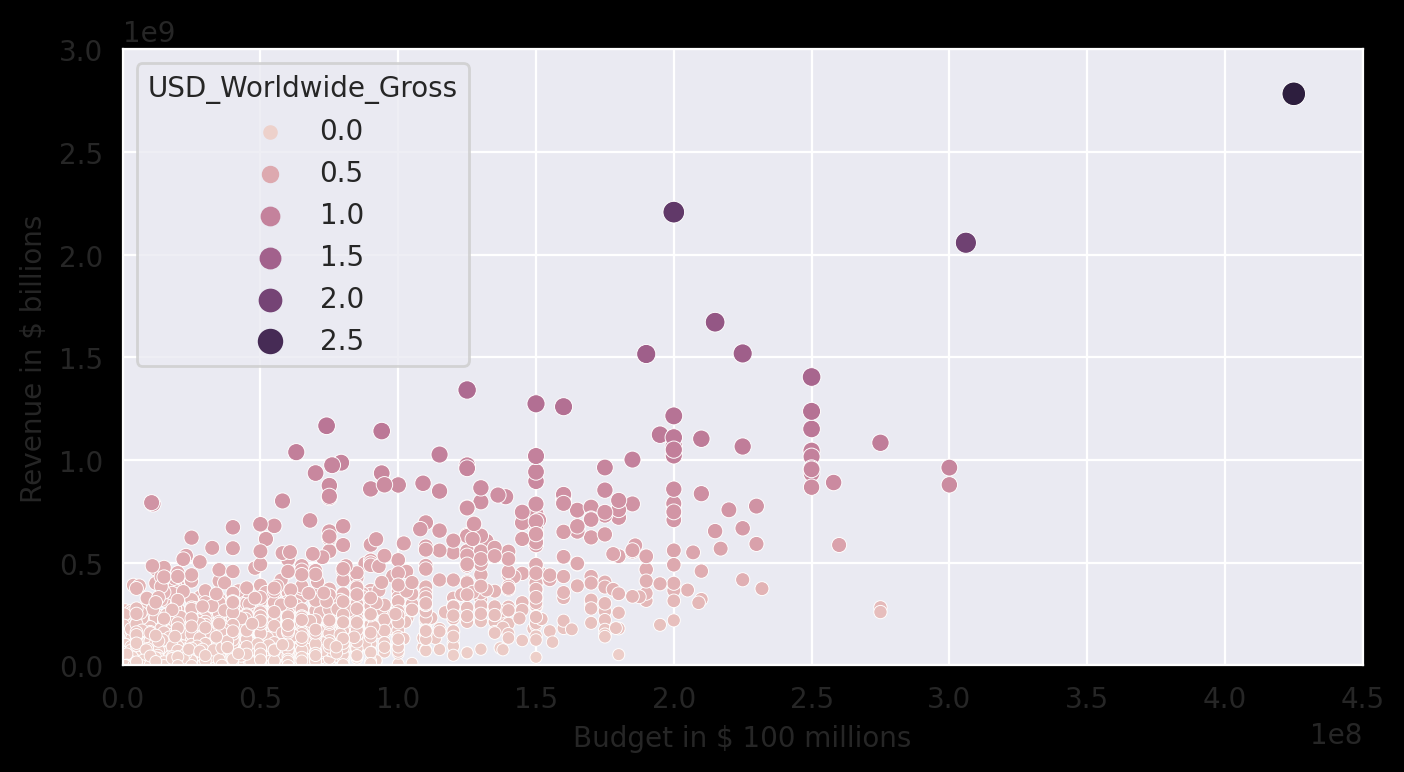

In [217]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross",
                        hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
    ax.set(ylim=(0,3000000000), xlim=(0,450000000), ylabel="Revenue in $ billions", xlabel="Budget in $ 100 millions")
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

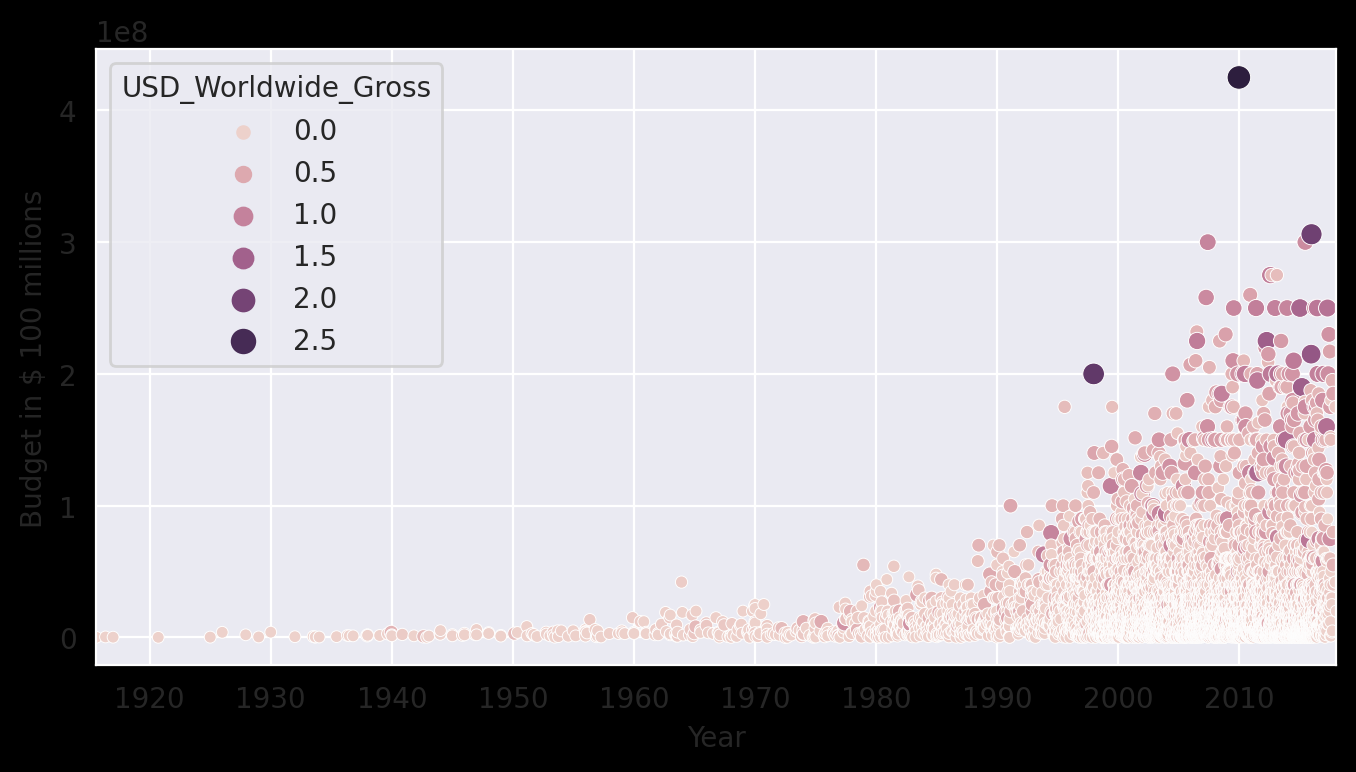

In [231]:
from matplotlib.dates import YearLocator
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x="Release_Date", y="USD_Production_Budget",
                         hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
    ax.set(xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),ylabel="Budget in $ 100 millions", xlabel="Year")
    ax.xaxis.set_major_locator(YearLocator(10))
    
plt.show()

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [246]:
dt_index = pd.DatetimeIndex(data=data_clean.Release_Date)
print(dt_index.year)
data_clean["Decades"] = dt_index.year // 10 * 10

old_films = data_clean.query("Decades < 1970")
new_films = data_clean.query("Decades >= 1970")
print(old_films.describe())
print(old_films.sort_values("USD_Production_Budget", ascending=False))



Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)
          Rank  USD_Production_Budget  USD_Worldwide_Gross  \
count   153.00                 153.00               153.00   
mean  4,274.77           4,611,297.65        30,419,634.38   
std     742.14           5,713,648.85        54,931,828.93   
min   1,253.00             100,000.00                 0.00   
25%   3,973.00           1,250,000.00         5,273,000.00   
50%   4,434.00           2,900,000.00        10,000,000.00   
75%   4,785.00           5,000,000.00        33,208,099.00   
max   5,299.00          42,000,000.00       390,525,192.00   

       USD_Domestic_Gross  Decades  
count              153.00   153.00  
mean        22,389,473.87 1,949.15  
std         32,641,752.41    12.72  
min                  0.00 1,910.00  
25%          5,000,000.00 1,940.00 

# Seaborn Regression Plots

[(100000.0, 42000000.0)]

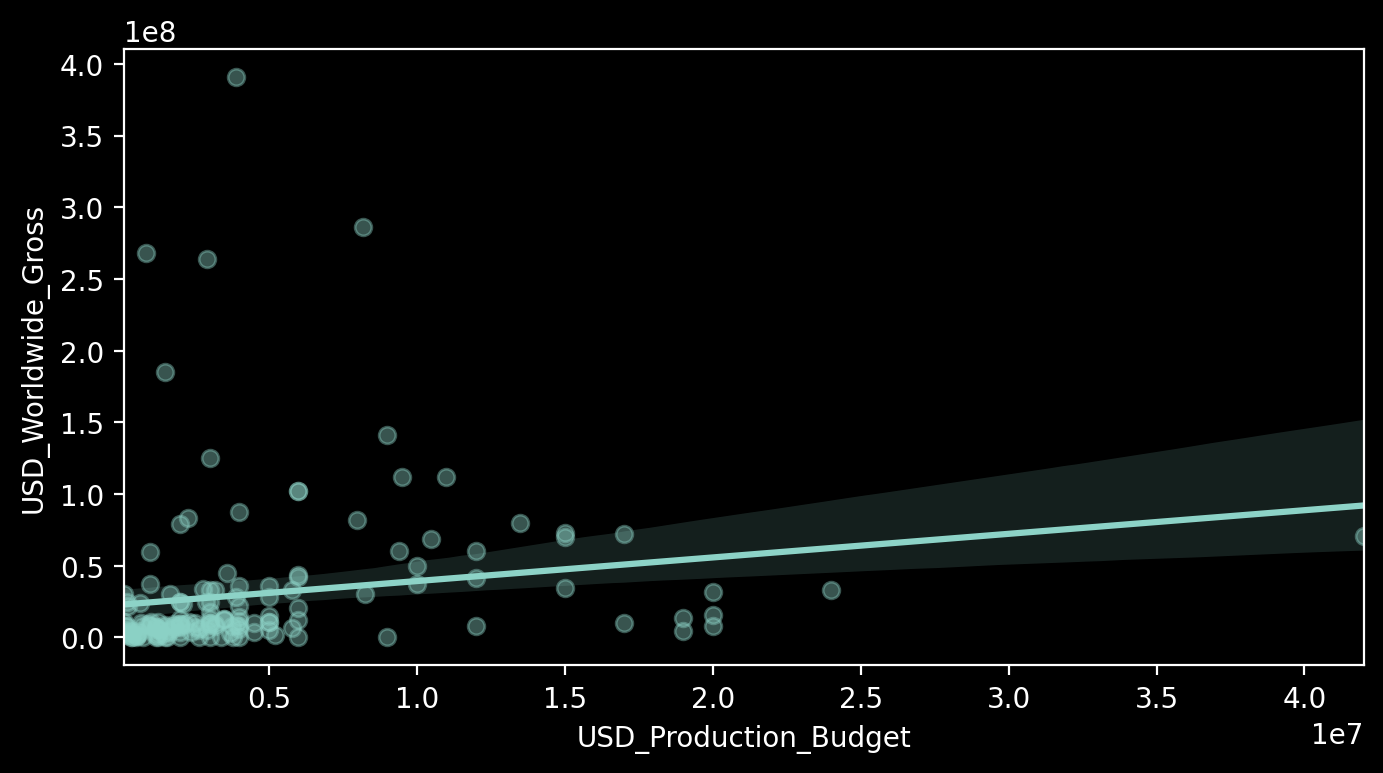

In [264]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.regplot(data=old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross",
        scatter_kws={"alpha": 0.4})
ax.set(xlim=(old_films.USD_Production_Budget.min(), old_films.USD_Production_Budget.max()))

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

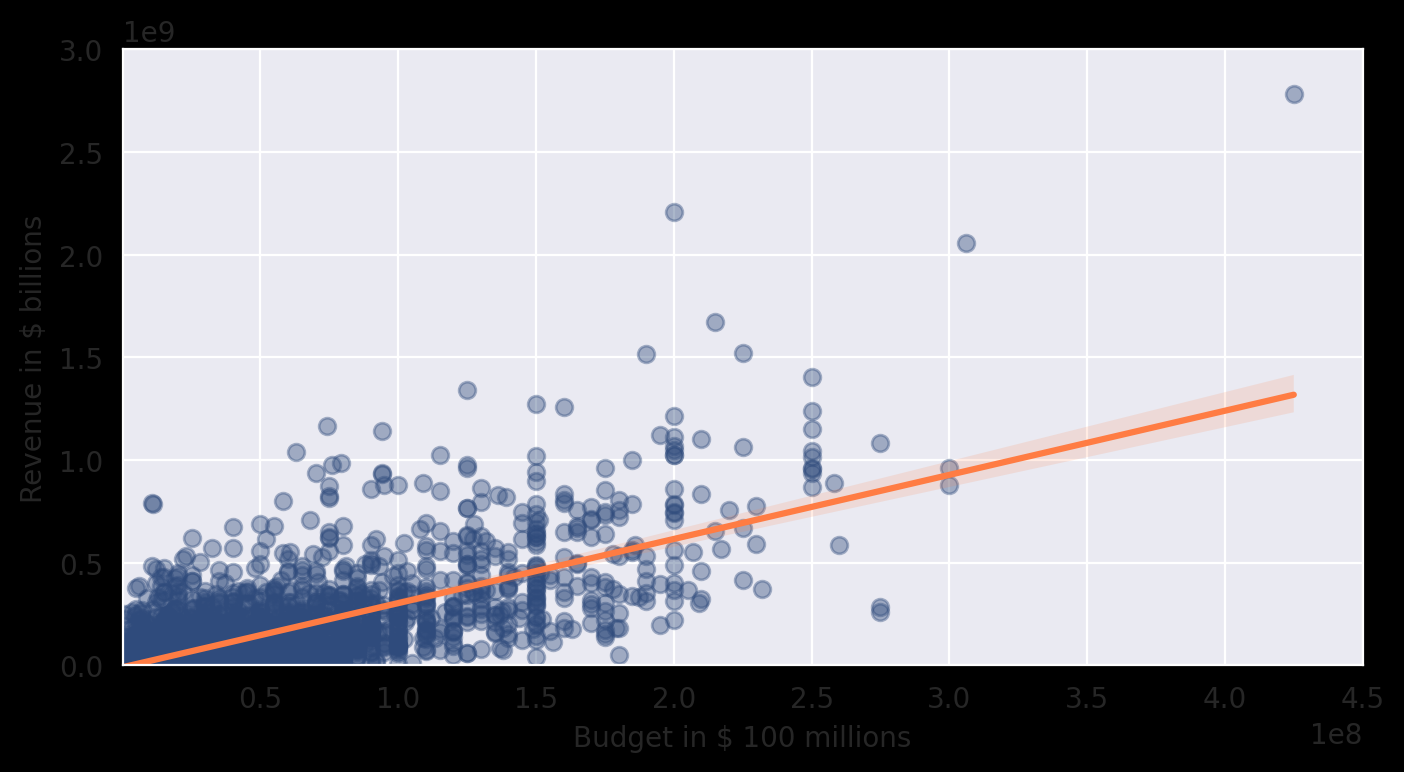

In [287]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, x="USD_Production_Budget", y="USD_Worldwide_Gross",
            scatter_kws={"alpha": 0.4}, color="#2f4b7c",line_kws={"color": "#ff7c43"})
    ax.set(xlim=(new_films.USD_Production_Budget.min(), 450000000),
           ylim=(0, 3000000000),xlabel="Budget in $ 100 millions", ylabel="Revenue in $ billions")
    
# 500 Million based on the linear regression line

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [295]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()

X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
print(X.head(n=5))
print(y.head(n=5))
regression.fit(X, y)
print(f"The y-intercept: {regression.intercept_}")
print(f"The slope: {regression.coef_}")

# This shows the percentage our model explains the variance in movie revenues 
print(f"R-squared: {regression.score(X, y)}")

     USD_Production_Budget
153               25000000
154               22000000
155               12000000
156               11000000
157                3500000
     USD_Worldwide_Gross
153                    0
154              5000000
155             62500000
156              2200000
157             81600000
The y-intercept: [-8650768.00661041]
The slope: [[3.12259592]]
R-squared: 0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [296]:
old_films_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_films_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(old_films_X, old_films_y)
print(f"The y-intercept: {regression.intercept_}")
print(f"The slope: {regression.coef_}")

The y-intercept: [22821538.63508038]
The slope: [[1.64771314]]


In [298]:
print(f"R-squared: {regression.score(old_films_X, old_films_y)}")

R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [301]:
revenue = regression.intercept_ + (regression.coef_ * 350000000) 
print(revenue)

[[5.99521139e+08]]


In [303]:
revenue = regression.intercept_[0] + (regression.coef_[0,0] * 350000000) 
revenue_estimate = round(revenue, 6)
print(f"Estimated revenue for a $350 mil film is: ${revenue_estimate:.10}")

Estimated revenue for a $350 mil film is: $599521139.0
